In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install imbalanced-learn -q
from imblearn.over_sampling import RandomOverSampler
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

def fit_and_evaluate_by_CV(model, X, y, cv=10, make_test_balanced=False):
  kf = StratifiedKFold(n_splits=cv)
  train_scores = []
  test_scores = []
  for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    if make_test_balanced:
      oversampler = RandomOverSampler(sampling_strategy='minority')
      X_test, y_test = oversampler.fit_resample(X_test, y_test)
    model_copy = clone(model)
    model_copy.fit(X_train, y_train)
    train_scores.append(model_copy.score(X_train, y_train))
    test_scores.append(model_copy.score(X_test, y_test))
  train_score = np.mean(train_scores)
  test_score = np.mean(test_scores)
  return train_score, test_score

import sys
import threading
from time import sleep
try:
    import thread
except ImportError:
    import _thread as thread

def quit_function(fn_name):
    # print to stderr, unbuffered in Python 2.
    #print('{0} took too long'.format(fn_name), file=sys.stderr)
    sys.stderr.flush() # Python 3 stderr is likely buffered.
    thread.interrupt_main() # raises KeyboardInterrupt

def exit_after(s):
    '''
    use as decorator to exit process if 
    function takes longer than s seconds
    '''
    def outer(fn):
        def inner(*args, **kwargs):
            timer = threading.Timer(s, quit_function, args=[fn.__name__])
            timer.start()
            try:
                result = fn(*args, **kwargs)
            finally:
                timer.cancel()
            return result
        return inner
    return outer

def run_with_timeout(func, timeout, on_timeout):
    try:
        func = exit_after(timeout)(func)
        return func()
    except KeyboardInterrupt:
        return on_timeout()

In [2]:
# instances: 100..2000
# features: <2000
# https://www.openml.org/search?q=qualities.NumberOfInstances%3A100..2000%2520qualities.NumberOfFeatures%3Alt%3B2000&type=data&listids=1&size=1530
ids = [699, 676, 704, 709, 665, 666, 23499, 1456, 1435, 1436, 1441, 1448, 1450, 1413, 1420, 23420, 4540, 4329, 4340, 1016, 1070, 1027, 1028, 1030, 1097, 1099, 1035, 890, 1245, 1228, 1571, 1572, 1574, 1600, 1589, 191, 206, 374, 299, 446, 482, 434, 560, 561, 566, 567, 568, 570, 575, 576, 577, 578, 505, 509, 522, 524, 528, 531, 533, 534, 536, 541, 543, 544, 546, 547, 549, 511, 513, 516, 492, 497, 315, 327, 328, 430, 42871, 42872, 42874, 42875, 42878, 42896, 42851, 42855, 42881, 42862, 42863, 42864, 42865, 42866, 42867, 42869, 42870, 42844, 42847, 42848, 42850, 42770, 42887, 42898, 42893, 42981, 42982, 42979, 42980, 42994, 42999, 43000, 43003, 43004, 43005, 43006, 43009, 42799, 42661, 42662, 42665, 42667, 42730, 42716, 42834, 42835, 42837, 42838, 42682, 42689, 42699, 42700, 41705, 41938, 41939, 712, 1029, 41702, 41703, 686, 689, 690, 695, 703, 672, 673, 678, 680, 42198, 42900, 43008, 652, 653, 654, 655, 656, 657, 658, 41465, 645, 646, 647, 648, 649, 650, 651, 42360, 579, 580, 581, 582, 583, 584, 41720, 41721, 41722, 41724, 41725, 41726, 1449, 41707, 41716, 41719, 41713, 40645, 40646, 40647, 40648, 40649, 40650, 40693, 40700, 40663, 40664, 40665, 40669, 40702, 40705, 40706, 40710, 40671, 40680, 40711, 40681, 40682, 40686, 40687, 40690, 41021, 40981, 41981, 41973, 41977, 41978, 41996, 41997, 41961, 41962, 41964, 41966, 41967, 41968, 41969, 41952, 41953, 41943, 41945, 41950, 42002, 42003, 42010, 40496, 41551, 41552, 41553, 41554, 41555, 41556, 41557, 41558, 41559, 41582, 41583, 41567, 41568, 42543, 42544, 42547, 42535, 42471, 42472, 42464, 42470, 40869, 40971, 40916, 41919, 41907, 42563, 42564, 42631, 42632, 42633, 42637, 42638, 42642, 42643, 42644, 42645, 42646, 42653, 42621, 42622, 42623, 42624, 42625, 42626, 42627, 42628, 42629, 42630, 42603, 42604, 42605, 42606, 42607, 42609, 42610, 42611, 42612, 42613, 42614, 42615, 42616, 42617, 42618, 42619, 42620, 40591, 40592, 40593, 40594, 40588, 40589, 40590, 40601, 42172, 42176, 42177, 42133, 42091, 42097, 42098, 42099, 42166, 42167, 42169, 41430, 42347, 42337, 42351, 42352, 42359, 42328, 41265, 41464, 41466, 41467, 41468, 41469, 41470, 41475, 41476, 41477, 41478, 41479, 41545, 41546, 41547, 41550, 41482, 41487, 41488, 41489, 41490, 41538, 41511, 41515, 41516, 41517, 41518, 41519, 41491, 41492, 41496, 41510, 42071, 42051, 42055, 42056, 42065, 42066, 42070, 42041, 42045, 42046, 42050, 42021, 42025, 42026, 42030, 42031, 42035, 42036, 42040, 42015, 42016, 42020, 42011, 42201, 42204, 42195, 42196, 42184, 42186, 42231, 42233, 42223, 42224, 42261, 41701, 41669, 42399, 42361, 42362, 42363, 42364, 42365, 42366, 42368, 42369, 42370, 42436, 42437, 42439, 42440, 42371, 42372, 42441, 42442, 42443, 42444, 42445, 42401, 585, 586, 587, 588, 589, 590, 591, 592, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 632, 633, 634, 635, 636, 637, 638, 619, 620, 621, 622, 623, 624, 625, 639, 640, 641, 642, 643, 644, 598, 599, 600, 601, 602, 603, 626, 627, 628, 629, 630, 631, 593, 594, 595, 596, 597, 41826, 41829, 41830, 41818, 41821, 41797, 41801, 41857, 41839, 41841, 41844, 41834, 41811, 41812, 41815, 41846, 41847, 41848, 41849, 41803, 43026, 42367, 519, 41897, 41894, 41864, 41866, 41867, 41868, 41882, 41872, 41874, 41875, 41858, 41863, 41750, 41753, 41754, 41756, 41760, 41764, 41765, 41766, 41737, 41740, 41744, 41746, 41730, 41731, 41733, 41783, 41784, 41785, 41788, 41790, 41791, 41769, 43028, 43029, 456, 471, 526, 535, 540, 551, 555, 556, 557, 506, 520, 521, 523, 494, 500, 501, 502, 663, 664, 670, 671, 42907, 42905, 42904, 42906, 784, 778, 779, 775, 773, 774, 783, 776, 782, 801, 811, 805, 806, 812, 808, 813, 954, 952, 949, 947, 950, 951, 955, 1484, 1490, 1493, 1492, 1491, 1488, 1482, 475, 329, 336, 464, 444, 335, 334, 448, 333, 469, 873, 876, 877, 868, 869, 870, 875, 934, 941, 937, 932, 933, 936, 943, 935, 931, 1047, 1045, 1050, 1049, 1054, 1048, 1549, 1555, 1551, 1552, 1554, 1553, 1556, 1547, 337, 450, 718, 714, 694, 716, 679, 717, 715, 888, 880, 879, 886, 889, 878, 885, 884, 965, 970, 956, 971, 973, 962, 969, 1447, 1453, 1444, 1451, 1443, 1446, 1452, 1442, 1515, 1520, 1519, 1523, 1524, 1528, 338, 745, 742, 748, 741, 746, 749, 744, 743, 747, 685, 719, 724, 723, 721, 726, 825, 828, 832, 827, 830, 829, 826, 1100, 1071, 1075, 1121, 1115, 1167, 1073, 1514, 1512, 1513, 1506, 1511, 1510, 1508, 461, 732, 733, 736, 740, 730, 818, 820, 824, 814, 915, 909, 913, 910, 908, 912, 916, 911, 1022, 1026, 1020, 1013, 1025, 1014, 1501, 1494, 1500, 1504, 1498, 1499, 1495, 463, 753, 756, 750, 751, 762, 763, 754, 865, 851, 853, 866, 850, 855, 863, 860, 867, 1004, 1012, 1006, 995, 994, 996, 1005, 1011, 997, 1455, 1467, 1464, 1462, 1465, 1463, 1545, 1544, 1542, 1543, 1546, 4153, 3773, 3769, 3771, 3772, 3775, 3776, 3845, 3843, 3847, 3849, 3910, 3913, 4016, 4021, 4017, 4015, 4019, 4094, 4090, 4091, 4088, 377, 796, 788, 797, 794, 793, 795, 789, 792, 799, 902, 904, 896, 903, 900, 907, 906, 895, 978, 987, 983, 974, 991, 1468, 1479, 1472, 1480, 1473, 458, 771, 767, 764, 765, 766, 769, 768, 770, 834, 837, 838, 841, 849, 845, 924, 921, 920, 918, 922, 926, 917, 925, 1066, 1065, 1068, 1064, 1063, 1059, 1061, 1529, 1530, 1566, 1565, 1559, 42908, 43035, 43033, 42931, 42930, 42911, 42912, 42972, 43038, 42895, 42969, 42965, 42964, 42968, 42966, 42989, 42970, 42971, 42585, 40691, 43062, 43059, 43060, 43064, 43063, 42165, 4544, 43071, 43070, 40945, 41514, 42438, 42608, 41976, 43076, 43075, 213, 207, 222, 224, 210, 223, 204, 231, 194, 195, 8, 1412, 200, 199, 232, 203, 196, 230, 229, 4353, 6332, 2, 5, 7, 9, 13, 25, 27, 29, 40979, 40966, 40982, 40994, 40975, 35, 42, 49, 51, 15, 56, 185, 171, 186, 488, 757, 188, 470, 474, 466, 452, 449, 454, 451, 738, 55, 455, 460, 810, 897, 990, 989, 984, 986, 3110, 3113, 3115, 3195, 3196, 3282, 3281, 3279, 3286, 3283, 3373, 3375, 3378, 3372, 3462, 3470, 3468, 3465, 3555, 3553, 3556, 3560, 3779, 3783, 3780, 3778, 3785, 3857, 3855, 3851, 3859, 3852, 3949, 3943, 3950, 3947, 3942, 3945, 3944, 3992, 3993, 3987, 4102, 4103, 4100, 4096, 4101, 313, 285, 311, 3805, 3810, 3812, 3811, 3813, 3809, 3837, 3836, 3834, 3835, 3838, 3921, 3922, 3914, 3920, 3915, 3916, 3917, 4004, 3999, 4000, 4082, 4081, 4085, 4077, 4080, 4078, 4084, 4079, 40, 43, 37, 41, 39, 3760, 3759, 3765, 3761, 3764, 3766, 3867, 3862, 3863, 3864, 3928, 3931, 4005, 4012, 4013, 4006, 4076, 4071, 164, 187, 181, 3724, 3735, 3732, 3725, 3734, 3727, 3733, 3731, 3730, 3817, 3821, 3823, 3819, 3820, 3897, 3899, 3900, 3902, 3901, 3904, 3898, 3979, 3978, 3982, 3981, 3980, 3985, 4061, 4062, 4064, 62, 54, 48, 59, 53, 61, 3802, 3801, 3881, 3880, 3878, 3879, 3885, 3977, 3976, 3969, 3971, 3974, 4056, 4055, 4058, 4053, 4052, 4057, 4050, 4051, 12, 10, 16, 14, 11, 20, 23, 22, 18, 3753, 3758, 3755, 3757, 3752, 3895, 3888, 3889, 3893, 3963, 3966, 3960, 3965, 4040, 4037, 4034, 4039, 4126, 4123, 4122, 4124, 3745, 3737, 3747, 3741, 3870, 3869, 3871, 3874, 3959, 3957, 3951, 4044, 4042, 4046, 4049, 4048, 4041, 4120, 4113, 4114, 4119, 3789, 3793, 3788, 3790, 3787, 3792, 3829, 3832, 3824, 3826, 3938, 3934, 4027, 4029, 4028, 4026, 4105, 4108, 4111, 3203, 3198, 3201, 3199, 3197, 3205, 3290, 3291, 3292, 3294, 3288, 3293, 3381, 3388, 3383, 3380, 3474, 3471, 3476, 3472, 3561, 3564, 3569, 3565, 3563, 3567, 3568, 3644, 3650, 3645, 3649, 3647, 940, 961, 963, 957, 1023, 3104, 3106, 3105, 3101, 3180, 3187, 3179, 3184, 3185, 3183, 3182, 3270, 3275, 3361, 3360, 3364, 3461, 3456, 3457, 3459, 3455, 3545, 3547, 3551, 3640, 3637, 798, 3090, 3097, 3092, 3096, 3089, 3267, 3265, 3262, 3352, 3359, 3358, 3354, 3450, 3449, 3452, 3444, 3445, 3534, 3540, 3538, 3535, 3541, 3628, 3632, 3629, 3630, 3624, 3658, 3657, 3651, 3659, 3652, 3655, 3661, 3667, 3663, 3664, 3665, 3666, 3678, 3673, 3672, 3676, 3677, 3684, 3683, 3682, 3685, 3686, 3690, 3693, 3692, 3689, 3696, 3700, 3703, 3697, 3699, 3714, 3712, 3711, 3707, 3713, 3715, 3721, 3720, 3722, 831, 999, 3053, 3061, 3054, 3059, 3143, 3149, 3145, 3233, 3234, 3239, 3328, 3330, 3441, 3440, 3439, 3526, 3533, 3529, 3527, 3530, 3525, 3614, 3609, 3611, 3612, 930, 1017, 1010, 3076, 3074, 3075, 3079, 3158, 3157, 3153, 3255, 3256, 3257, 3259, 3333, 3338, 3335, 3334, 3337, 3432, 3426, 3428, 3425, 3433, 3430, 3518, 3619, 3622, 3615, 3616, 786, 967, 966, 968, 3082, 3085, 3080, 3086, 3163, 3166, 3169, 3161, 3162, 3245, 3247, 3243, 3249, 3246, 3350, 3346, 3349, 3342, 3344, 3417, 3424, 3423, 3420, 3419, 3507, 3511, 3510, 3515, 3603, 3598, 3605, 3597, 3599, 3604, 840, 839, 844, 1008, 1007, 1003, 3067, 3064, 3063, 3069, 3070, 3141, 3140, 3136, 3138, 3139, 3134, 3230, 3229, 3231, 3224, 3316, 3323, 3410, 3413, 3414, 3415, 3412, 3498, 3503, 3500, 3504, 3505, 3589, 3588, 3596, 802, 852, 944, 939, 3045, 3052, 3047, 3044, 3046, 3048, 3133, 3131, 3126, 3127, 3132, 3221, 3215, 3220, 3222, 3311, 3305, 3312, 3306, 3307, 3308, 3309, 3399, 3398, 3403, 3401, 3406, 3402, 3490, 3493, 3495, 3489, 3492, 3497, 3581, 3585, 3584, 3583, 858, 854, 975, 982, 3043, 3121, 3118, 3119, 3117, 3209, 3210, 3212, 3207, 3213, 3297, 3302, 3300, 3298, 3301, 3296, 3397, 3396, 3394, 3393, 3484, 3485, 3488, 3486, 3480, 3482, 3574, 3570, 3578, 3575, 3571, 4074, 4038, 4008, 481, 31, 43085, 307, 23381, 50]

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from IPython.display import clear_output
import time

good_datasets = pd.DataFrame(columns=['id', 'examples', 'features', 'classes', 'top class',
                                     'LR test', 'SVC test', 'GB test', 'RF test',
                                     'LR train', 'SVC train', 'GB train', 'RF train'])

for id in ids:
  time.sleep(0.1) #to be able to interrupt loop
  #print(id)
  try:
    # fetch
    def fetch():
        return fetch_openml(data_id=id, return_X_y=True, as_frame=False, version='active')
    def fetch_on_timeout():
        raise Exception('fetch timeout')
    X, y = run_with_timeout(func=fetch, timeout=30, on_timeout=fetch_on_timeout)
    
    # general check
    if X is None or y is None:
      raise Exception('data is None')
    if X.ndim != 2 or y.ndim != 1:
      raise Exception('wrong data ndims')
    if not isinstance(X, np.ndarray):
      X = X.toarray()
    if not isinstance(y, np.ndarray):
      y = y.toarray()
    
    # counts check
    classes_count = len(np.unique(y))
    if X.shape[0] < 100:
      raise Exception(f'too few examples: {X.shape[0]}')
    if classes_count > 100:
      raise Exception(f'too many classes: {classes_count}')
    y = LabelEncoder().fit_transform(y)
    class_counts = np.bincount(y)
    class_counts = class_counts[class_counts != 0]
    if class_counts.min() < 10:
      raise Exception(f'class has too few examples: {class_counts.min()}')
    
    # preprocess
    X = StandardScaler().fit_transform(np.nan_to_num(X))
    
    # saving general info
    top_class_ratio = np.bincount(y).max()/len(y)
    ds_info = {
        'id': id,
        'examples': X.shape[0],
        'features': X.shape[1],
        'classes': len(np.unique(y)),
        'top class': f'{top_class_ratio*100:.1f}%'
    }
    display(ds_info)
    
    # training
    
    print('training LogisticRegression')
    train_score, test_score = run_with_timeout(
        func=lambda: fit_and_evaluate_by_CV(LogisticRegression(solver='liblinear'), X, y),
        timeout=10, on_timeout=lambda: (np.nan, np.nan)
    )
    ds_info['LR train'] = f'{(train_score-top_class_ratio)*100:+.1f}%'
    ds_info['LR test'] = f'{(test_score-top_class_ratio)*100:+.1f}%'
    
    print('training SVC')
    train_score, test_score = run_with_timeout(
        func=lambda: fit_and_evaluate_by_CV(SVC(), X, y),
        timeout=10, on_timeout=lambda: (np.nan, np.nan)
    )
    ds_info['SVC train'] = f'{(train_score-top_class_ratio)*100:+.1f}%'
    ds_info['SVC test'] = f'{(test_score-top_class_ratio)*100:+.1f}%'
    
    print('training GradientBoostingClassifier')
    train_score, test_score = run_with_timeout(
        func=lambda: fit_and_evaluate_by_CV(GradientBoostingClassifier(), X, y),
        timeout=10, on_timeout=lambda: (np.nan, np.nan)
    )
    ds_info['GB train'] = f'{(train_score-top_class_ratio)*100:+.1f}%'
    ds_info['GB test'] = f'{(test_score-top_class_ratio)*100:+.1f}%'
    
    print('training RandomForestClassifier')
    train_score, test_score = run_with_timeout(
        func=lambda: fit_and_evaluate_by_CV(RandomForestClassifier(), X, y),
        timeout=10, on_timeout=lambda: (np.nan, np.nan)
    )
    ds_info['RF train'] = f'{(train_score-top_class_ratio)*100:+.1f}%'
    ds_info['RF test'] = f'{(test_score-top_class_ratio)*100:+.1f}%'

    # saving
    good_datasets = good_datasets.append(ds_info, ignore_index=True)
    
    # displaying
    clear_output(wait=True)
    display(good_datasets)
  except Exception as e:
    print(f'ERROR for id {id}: {e}')
    pass

,id,examples,features,classes,top class,LR test,SVC test,GB test,RF test,LR train,SVC train,GB train,RF train
0,23499,277,9,2,70.8%,+3.0%,+3.6%,+1.8%,+1.1%,+5.0%,+11.2%,+18.1%,+27.3%
1,1435,862,2,2,64.4%,+11.4%,+29.8%,+34.5%,+34.8%,+11.5%,+30.9%,+35.6%,+35.6%
2,1436,1000,24,2,70.0%,+6.8%,+6.6%,+6.8%,+7.1%,+8.7%,+16.4%,+19.5%,+30.0%
3,1441,123,39,2,87.0%,+0.8%,+0.9%,-1.7%,-4.0%,+6.9%,+7.3%,+13.0%,+13.0%
4,1448,194,39,2,81.4%,-2.5%,+0.0%,+0.0%,+2.1%,+4.6%,+3.6%,+18.6%,+18.6%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,481,209,8,2,64.1%,+22.5%,+26.3%,+27.3%,+27.3%,+25.0%,+29.0%,+35.9%,+35.9%
451,31,1000,20,2,70.0%,+6.2%,+6.3%,+6.9%,+6.8%,+7.1%,+16.0%,+20.1%,+30.0%
452,307,990,12,11,9.1%,+35.8%,+66.2%,+nan%,+62.4%,+53.0%,+89.0%,+nan%,+90.9%
453,23381,500,12,2,58.0%,-1.2%,-1.6%,-1.8%,-2.4%,+2.9%,+16.1%,+27.5%,+41.6%


In [16]:
good_datasets.to_csv('good_datasets.csv', index=False)

In [18]:
import pandas as pd
good_datasets = pd.read_csv('good_datasets.csv')
good_datasets

,id,examples,features,classes,top class,LR test,SVC test,GB test,RF test,LR train,SVC train,GB train,RF train
0,23499,277,9,2,70.8%,+3.0%,+3.6%,+1.8%,+1.1%,+5.0%,+11.2%,+18.1%,+27.3%
1,1435,862,2,2,64.4%,+11.4%,+29.8%,+34.5%,+34.8%,+11.5%,+30.9%,+35.6%,+35.6%
2,1436,1000,24,2,70.0%,+6.8%,+6.6%,+6.8%,+7.1%,+8.7%,+16.4%,+19.5%,+30.0%
3,1441,123,39,2,87.0%,+0.8%,+0.9%,-1.7%,-4.0%,+6.9%,+7.3%,+13.0%,+13.0%
4,1448,194,39,2,81.4%,-2.5%,+0.0%,+0.0%,+2.1%,+4.6%,+3.6%,+18.6%,+18.6%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,481,209,8,2,64.1%,+22.5%,+26.3%,+27.3%,+27.3%,+25.0%,+29.0%,+35.9%,+35.9%
451,31,1000,20,2,70.0%,+6.2%,+6.3%,+6.9%,+6.8%,+7.1%,+16.0%,+20.1%,+30.0%
452,307,990,12,11,9.1%,+35.8%,+66.2%,+nan%,+62.4%,+53.0%,+89.0%,+nan%,+90.9%
453,23381,500,12,2,58.0%,-1.2%,-1.6%,-1.8%,-2.4%,+2.9%,+16.1%,+27.5%,+41.6%


In [19]:
good_datasets_cleared = good_datasets.copy()
for column in ['top class', 'LR test', 'SVC test', 'GB test', 'RF test',
               'LR train', 'SVC train', 'GB train', 'RF train']:
    good_datasets_cleared[column] = good_datasets_cleared[column].str.strip('%').astype(float)
test_columns = ['LR test', 'SVC test', 'GB test', 'RF test']
train_columns = ['LR train', 'SVC train', 'GB train', 'RF train']
for column in test_columns:
    good_datasets_cleared = good_datasets_cleared[~good_datasets_cleared[column].isnull()]
good_datasets_cleared['min test gain'] = np.array([good_datasets_cleared[col] for col in test_columns]).min(axis=0)
good_datasets_cleared['avg test gain'] = np.array([good_datasets_cleared[col] for col in test_columns]).mean(axis=0)
good_datasets_cleared['max test gain'] = np.array([good_datasets_cleared[col] for col in test_columns]).max(axis=0)
good_datasets_cleared

,id,examples,features,classes,top class,LR test,SVC test,GB test,RF test,LR train,SVC train,GB train,RF train,min test gain,avg test gain,max test gain
0,23499,277,9,2,70.8,3.0,3.6,1.8,1.1,5.0,11.2,18.1,27.3,1.1,2.375,3.6
1,1435,862,2,2,64.4,11.4,29.8,34.5,34.8,11.5,30.9,35.6,35.6,11.4,27.625,34.8
2,1436,1000,24,2,70.0,6.8,6.6,6.8,7.1,8.7,16.4,19.5,30.0,6.6,6.825,7.1
3,1441,123,39,2,87.0,0.8,0.9,-1.7,-4.0,6.9,7.3,13.0,13.0,-4.0,-1.000,0.9
4,1448,194,39,2,81.4,-2.5,0.0,0.0,2.1,4.6,3.6,18.6,18.6,-2.5,-0.100,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,982,303,13,2,54.5,28.7,26.1,25.7,28.7,30.1,37.5,44.9,45.5,25.7,27.300,28.7
450,481,209,8,2,64.1,22.5,26.3,27.3,27.3,25.0,29.0,35.9,35.9,22.5,25.850,27.3
451,31,1000,20,2,70.0,6.2,6.3,6.9,6.8,7.1,16.0,20.1,30.0,6.2,6.550,6.9
453,23381,500,12,2,58.0,-1.2,-1.6,-1.8,-2.4,2.9,16.1,27.5,41.6,-2.4,-1.750,-1.2


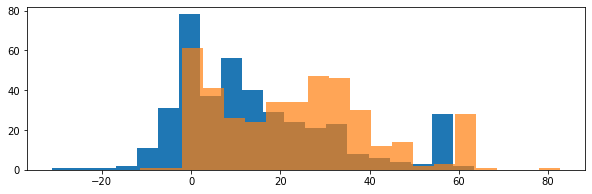

In [20]:
plt.figure(figsize=(10, 3))
plt.hist(good_datasets_cleared['min test gain'], bins=20)
plt.hist(good_datasets_cleared['max test gain'], bins=20, alpha=0.7)
plt.show()

In [21]:
too_high_accuracy = (good_datasets_cleared['top class'] + good_datasets_cleared['max test gain']) > 95
too_low_gain = good_datasets_cleared['max test gain'] < 10
too_small_difference = (good_datasets_cleared['max test gain'] - good_datasets_cleared['min test gain']) < 5
good_datasets_cleared = good_datasets_cleared[~too_high_accuracy & ~too_low_gain & ~too_small_difference]
good_datasets_cleared

,id,examples,features,classes,top class,LR test,SVC test,GB test,RF test,LR train,SVC train,GB train,RF train,min test gain,avg test gain,max test gain
11,1099,150,4,5,20.0,9.3,11.3,2.7,3.3,15.8,30.4,80.0,80.0,2.7,6.650,11.3
13,1228,144,76,2,66.7,4.1,7.7,17.3,16.0,31.9,28.5,33.3,33.3,4.1,11.275,17.3
21,524,418,19,3,55.5,22.2,21.3,15.6,18.9,27.3,30.8,44.5,44.5,15.6,19.500,22.2
24,328,105,11,6,41.9,22.3,24.1,27.8,20.1,32.1,37.4,58.1,58.1,20.1,23.575,27.8
26,1029,1000,4,5,40.3,17.7,23.0,22.7,22.1,18.8,24.7,26.7,26.8,17.7,21.375,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,802,1945,18,2,50.0,18.9,20.1,7.0,15.6,20.7,32.3,38.4,50.0,7.0,15.400,20.1
444,944,130,9,2,50.8,26.2,25.4,15.4,23.8,29.4,32.6,49.2,49.2,15.4,22.700,26.2
446,858,294,13,2,63.9,19.1,17.4,10.2,11.9,21.4,25.5,35.0,36.1,10.2,14.650,19.1
448,975,205,25,2,67.3,2.4,-3.5,7.3,11.8,16.6,23.1,32.7,32.7,-3.5,4.500,11.8


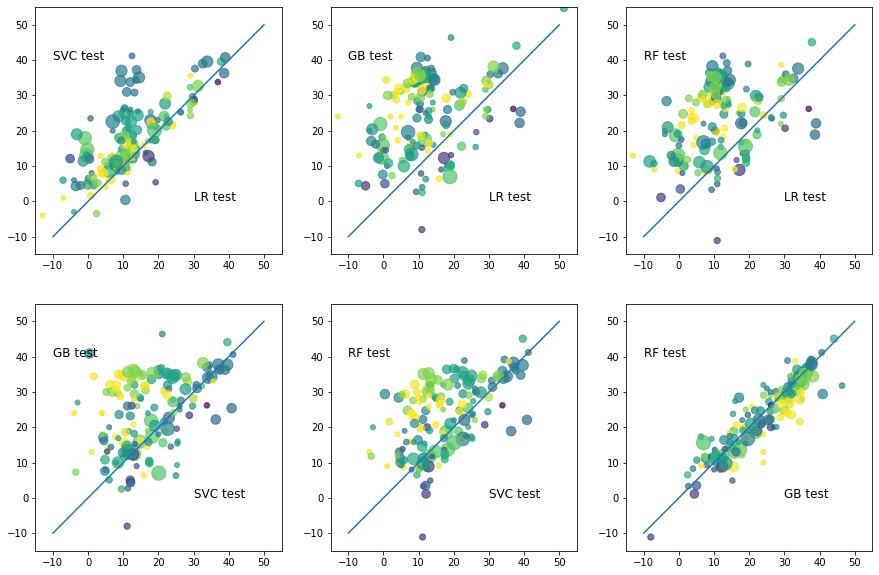

In [22]:
def compare(ax, gain1, gain2):
    ax.scatter(
        good_datasets_cleared[gain1], good_datasets_cleared[gain2], alpha=0.7,
        s=good_datasets_cleared['examples'].astype(int) ** 0.7,
        color=plt.get_cmap('viridis')(np.log(good_datasets_cleared['features'].astype(float)) / 4)
    )
    ax.plot([-10, 50], [-10, 50])
    ax.set_xlim(-15, 55)
    ax.set_ylim(-15, 55)
    ax.text(-10, 40, gain2, fontsize=12)
    ax.text(30, 0, gain1, fontsize=12)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
compare(axes.flat[0], 'LR test', 'SVC test')
compare(axes.flat[1], 'LR test', 'GB test')
compare(axes.flat[2], 'LR test', 'RF test')
compare(axes.flat[3], 'SVC test', 'GB test')
compare(axes.flat[4], 'SVC test', 'RF test')
compare(axes.flat[5], 'GB test', 'RF test')
plt.show()

In [24]:
datasets_to_save = good_datasets[good_datasets.id.isin(good_datasets_cleared.id)]
datasets_to_save

,id,examples,features,classes,top class,LR test,SVC test,GB test,RF test,LR train,SVC train,GB train,RF train
11,1099,150,4,5,20.0%,+9.3%,+11.3%,+2.7%,+3.3%,+15.8%,+30.4%,+80.0%,+80.0%
13,1228,144,76,2,66.7%,+4.1%,+7.7%,+17.3%,+16.0%,+31.9%,+28.5%,+33.3%,+33.3%
21,524,418,19,3,55.5%,+22.2%,+21.3%,+15.6%,+18.9%,+27.3%,+30.8%,+44.5%,+44.5%
24,328,105,11,6,41.9%,+22.3%,+24.1%,+27.8%,+20.1%,+32.1%,+37.4%,+58.1%,+58.1%
26,1029,1000,4,5,40.3%,+17.7%,+23.0%,+22.7%,+22.1%,+18.8%,+24.7%,+26.7%,+26.8%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,802,1945,18,2,50.0%,+18.9%,+20.1%,+7.0%,+15.6%,+20.7%,+32.3%,+38.4%,+50.0%
444,944,130,9,2,50.8%,+26.2%,+25.4%,+15.4%,+23.8%,+29.4%,+32.6%,+49.2%,+49.2%
446,858,294,13,2,63.9%,+19.1%,+17.4%,+10.2%,+11.9%,+21.4%,+25.5%,+35.0%,+36.1%
448,975,205,25,2,67.3%,+2.4%,-3.5%,+7.3%,+11.8%,+16.6%,+23.1%,+32.7%,+32.7%


In [27]:
datasets_to_save.to_csv('datasets.csv', index=False)